# Módulo 5 Sprint

## Tema

**Aprendizaje de máquina supervisado**


*Objetivo del proyecto (Competencias del módulo)*


**Elaborar un modelo predictivo a partir de un set de datos utilizando técnicas de aprendizaje de máquina supervisado implementados en lenguaje Python para resolver un problema.**


# Descripción del ejercicio


## Contexto


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.


La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

**1.- Enliste todas las librerías que utilizará**

*Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba*


**2.- Importación y revisión de los datos**  *Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)*

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [337]:
import warnings
warnings.filterwarnings(action='ignore') 



In [338]:
pro_pol_2009 = pd.read_csv('2009_1perc.csv')
pro_pol_2010 = pd.read_csv('2010_1perc.csv')

df_procedimientos_policiales = pd.concat([pro_pol_2009, pro_pol_2010]).reset_index()
df_procedimientos_policiales = df_procedimientos_policiales.drop(columns=['index'])

variable_respuesta = 'arstmade'

df_procedimientos_policiales.head()


,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [339]:
df_procedimientos_policiales = df_procedimientos_policiales.replace(' ', np.nan)


df_procedimientos_policiales.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,NaN,41,G,7,NaN,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,NaN,108,J,NaN,NaN,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,NaN,43,E,NaN,NaN,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,NaN,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,NaN,110,H,NaN,NaN,1024535,0209890,CM,1,20


In [340]:

dimensiones_df = df_procedimientos_policiales.shape   # (11825, 112)
info_df = df_procedimientos_policiales.info()  # dtypes: float64(7), int64(16), object(89)

categorical = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='O']
integer_variable = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='int64']
float_variable = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='float64']

df_categorical = df_procedimientos_policiales[categorical]
df_integer_variable = df_procedimientos_policiales[integer_variable]
df_float_variable = df_procedimientos_policiales[float_variable]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(7), int64(16), object(89)
memory usage: 10.1+ MB


In [341]:
df_categorical.head()

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,...,city,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,A,O,P,CPW,P,Y,N,N,NaN,N,...,BRONX,41,G,7,NaN,1013067,0238633,CM,1,20
1,A,O,P,BURG,P,Y,Y,N,NaN,N,...,QUEENS,108,J,NaN,NaN,1012043,0212157,CM,1,14
2,1,O,P,MISD,V,Y,N,N,NaN,N,...,BRONX,43,E,NaN,NaN,1017599,0240200,CM,1,20
3,A,O,P,MIS,P,Y,N,N,NaN,N,...,BROOKLYN,77,J,4,35,1002625,0183442,CM,1,24
4,A,O,P,CPW,P,Y,Y,N,NaN,N,...,QUEENS,110,H,NaN,NaN,1024535,0209890,CM,1,20


In [342]:
df_integer_variable.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
0,178048,2009,41,1779,4032009,130,2,0,0,41,41,7111984,24,5,9,145
1,498873,2009,108,5805,10292009,1050,5,0,0,108,108,12151993,15,5,5,140
2,463573,2009,43,8340,10062009,1450,1,0,0,43,43,7031987,21,6,3,220
3,43626,2009,77,932,1232009,1843,5,0,0,77,77,3131986,22,5,5,120
4,563921,2009,110,11224,12132009,1655,10,0,0,110,110,9221991,18,5,6,165


In [343]:
df_float_variable.head()

,perobs,othfeatr,rescode,premtype,aptnum,state,zip
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
df_int_nulos = df_integer_variable.isnull().sum()
df_flo_nulos = df_float_variable.isnull().sum()
df_cat_nulos = df_categorical.isnull().sum()


df_nulos = pd.concat([df_int_nulos, df_cat_nulos, df_flo_nulos])
df_nulos = df_nulos[(df_nulos != 0)]

columna = ['Cantidad']

df_nulos = pd.DataFrame(df_nulos, columns=columna)

df_nulos['Porcentaje'] = round((df_nulos / df_procedimientos_policiales.shape[0]) * 100, 2)

df_nulos = df_nulos.sort_values('Cantidad', ascending=False)

cantidad_registros_nulos = df_nulos['Cantidad'].sum()   # 156956

df_nulos

,Cantidad,Porcentaje
zip,11825,100.00
state,11825,100.00
aptnum,11825,100.00
premtype,11825,100.00
rescode,11825,100.00
othfeatr,11825,100.00
officrid,11664,98.64
arstoffn,11078,93.68
sumoffen,11023,93.22
post,10651,90.07


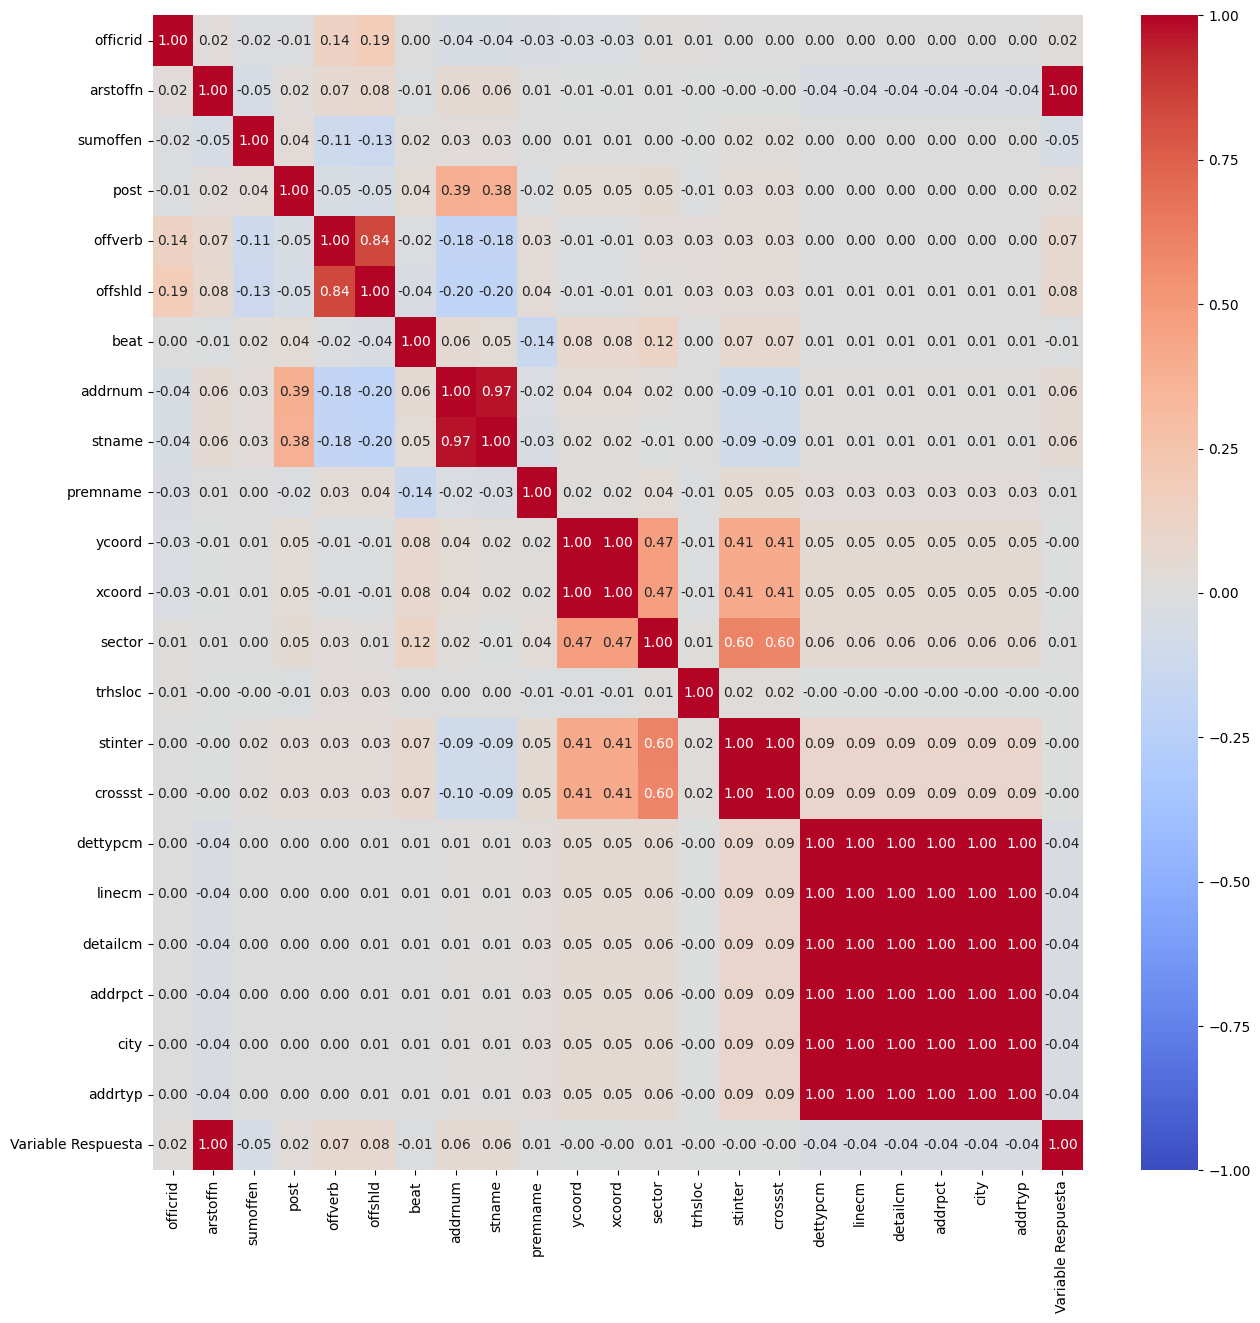

In [345]:
columnas_nulos = list(df_nulos.sort_values('Cantidad', ascending=False).index)

df_correlacion = pd.DataFrame(df_procedimientos_policiales[columnas_nulos].notnull().astype(int))
df_1 = pd.DataFrame(df_procedimientos_policiales[variable_respuesta].replace('N', 0).replace('Y', 1))


df_correlacion['Variable Respuesta'] = df_1


df_correlacion = df_correlacion.drop(['zip', 'state', 'aptnum', 'premtype', 'rescode', 'othfeatr'], axis=1)

matriz_correlacion = df_correlacion.corr()

figure = plt.figure(figsize=(15, 15))

sns.heatmap(data=matriz_correlacion, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()


In [346]:
len(df_procedimientos_policiales['city'].value_counts())

6

In [347]:
columnas_2_valores = []

for columna in df_procedimientos_policiales:
    if len(df_procedimientos_policiales[columna].value_counts())  == 2:
        columnas_2_valores.append(columna)



print("Columnas con dos valores: ",columnas_2_valores)
print(len(columnas_2_valores))


Columnas con dos valores:  ['year', 'recstat', 'inout', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'linecm']
60


In [348]:
df_2_valores = df_procedimientos_policiales[columnas_2_valores]
df_2_valores

,year,recstat,inout,explnstp,othpers,arstmade,sumissue,offunif,frisked,searched,...,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,linecm
0,2009,A,O,Y,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,1
1,2009,A,O,Y,Y,N,N,N,Y,Y,...,N,N,N,Y,N,N,N,Y,N,1
2,2009,1,O,Y,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,Y,N,1
3,2009,A,O,Y,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,1
4,2009,A,O,Y,Y,N,N,Y,Y,N,...,N,N,N,N,N,N,N,Y,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,2010,1,O,Y,N,N,N,Y,Y,N,...,N,N,N,N,N,N,N,Y,N,1
11821,2010,A,O,Y,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,Y,N,1
11822,2010,A,O,Y,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,1
11823,2010,1,O,Y,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,Y,N,1


In [349]:
def distribution_plots(df, columns=3):
    
    rows = np.ceil(df.shape[1] / columns).astype(int)
    height = rows * 3.5
    fig = plt.figure(figsize=(12, height))
 
    for n, i in enumerate(df.columns):
        
        if df[i].dtype in ('object', 'int64') :
            fig.add_subplot(rows, columns, n+1)
            ax = sns.countplot(x=i, data=df)
            plt.title(i)
            plt.xlabel('')
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2., height + .5,
                    '{:1.2f}'.format(height/len(df[i])), ha="center")

        if df[i].dtype == 'float64':
            fig.add_subplot(rows, columns, n+1)
            ax = sns.distplot(df[i])
            plt.title(i)
            plt.xlabel('')
            
    plt.tight_layout()

    return

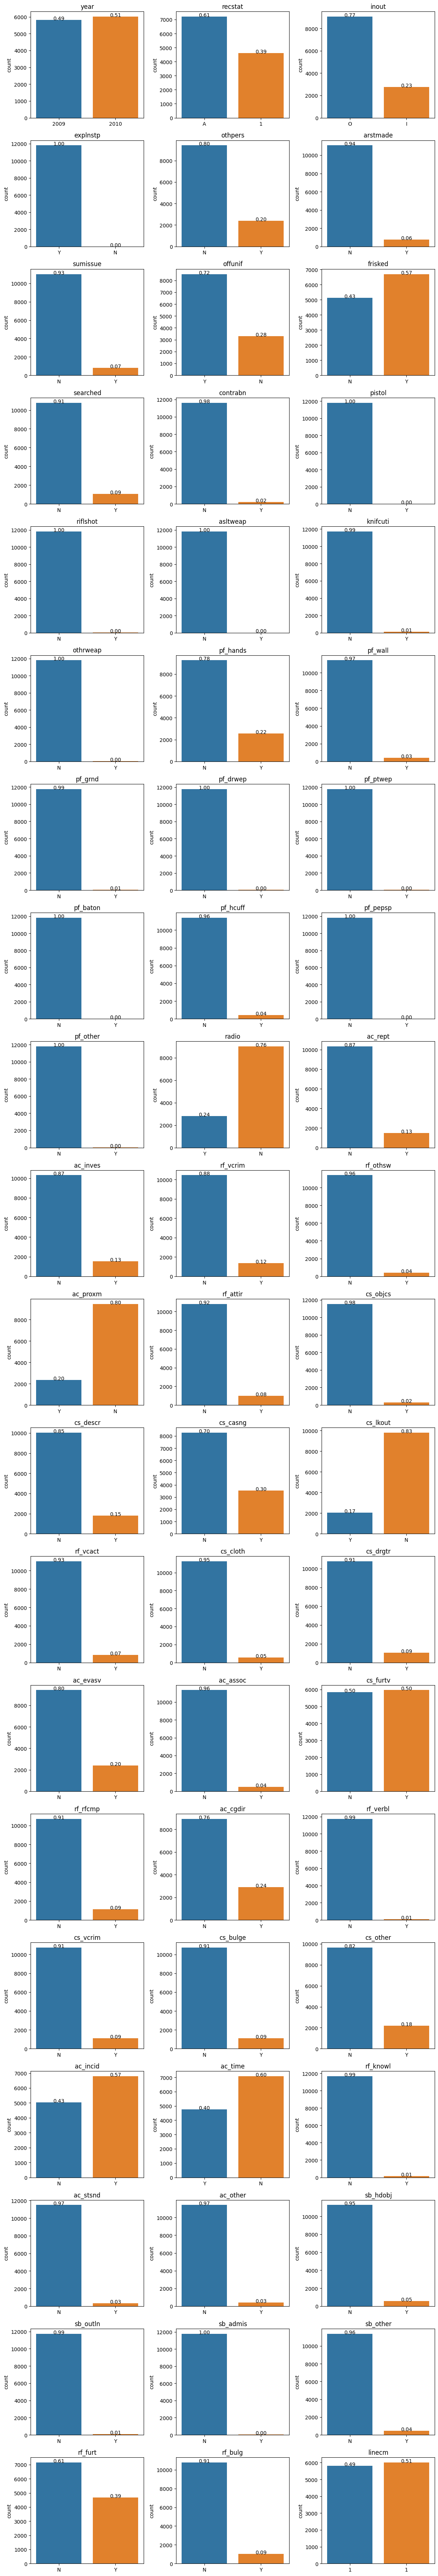

In [350]:
distribution_plots(df_2_valores)


In [351]:
print(df_procedimientos_policiales['arstmade'].describe())

print('=' * 50)

print(df_procedimientos_policiales['arstmade'].value_counts())

print('=' * 50)

print(f'La cantidad total de registros nulos en el data frame es: {cantidad_registros_nulos}')
print(f'Corresponde al {(cantidad_registros_nulos/df_procedimientos_policiales.size * 100):.2f} % del total de registros del DataFrame')
print('\n' + f'La cantidad de filas en el DataFrame es {df_procedimientos_policiales.shape[0]}')
print(f'La cantidad de columnas en el DataFrame es {df_procedimientos_policiales.shape[1]}')
print('\n' + f'Variables Integer: {df_integer_variable.shape[1]}')
print(f'Variables Float: {df_float_variable.shape[1]}')
print(f'Variables Categóricas: {df_categorical.shape[1]}')
print(f'La cantidad de variables que incluyen registros nulos es {df_nulos.shape[0]}')



count     11825
unique        2
top           N
freq      11077
Name: arstmade, dtype: object
arstmade
N    11077
Y      748
Name: count, dtype: int64
La cantidad total de registros nulos en el data frame es: 156956
Corresponde al 11.85 % del total de registros del DataFrame

La cantidad de filas en el DataFrame es 11825
La cantidad de columnas en el DataFrame es 112

Variables Integer: 16
Variables Float: 7
Variables Categóricas: 89
La cantidad de variables que incluyen registros nulos es 28


Se importan los datos en dos variables y se concatenan en *'df_procedimientos_policiales'*, DataFrame del cual se realizará el estudio.  Las dimensiones de este DataFrame es 11825 filas por 112 columnas.  En primera visualización se obtiene vista de registros vacíos pero que no son considerados por Python como nulos ya que son registros que contienen ' ' (espacio) caracter lo que es distinto a vacío o nulo.  Se reemplazan los valores (espacio) por el valor np.nan.  Se exploran el tipo de dato de las variables obteniendo: 89 variables categóricas (se restan 6 variables categóricas al df original cuando se realiza el paso de replace); 16 variables Integer y 7 variables Float.  Decido observar en detalle la calidad de los datos *por cada tipo de dato* y me parece útil crear DataFrames *por cada tipo de dato* y explorarlos en profundidad.  Algunas observaciones:

- 6 de las 7 variables float no contiene datos en su totalidad (todos Nan), por consiguiente estas variables no tienen ninguna influencia en la variable target y se sugiere eliminar del modelo pues no aporta poder predictivo.  Estas variables son las mismas que se reclasificaron como float luego de la accion .replace().

- Al reemplazar los registros con caracter (espacio) ' ', se pudo descubrir los valores perdidos que en total del DataFrame asciende a 156.956 registros y corresponde al 11,85% del total de registros del DataFrame

- Se observa que en las variables integer existen datos que no aportan valor estadístico como 'Unnamed:0' y 'dob'.  Se sugiere eliminarlas del modelo.  Se aprecia tambien que existen variables del tipo DatTime como 'year', 'datestop', 'timestop'.

- Se quiere observar el comportamiento de las variables que tienen valores binarios para descubrir desbalances que no aporten valor al modelo.  Se obtiene que de las 112 columnas, 60 contienen datos binarios.  Se incluye función que permite graficar los datos comparativos de estas 60 variables.  Con este resultado podemos observar que el 6% de los procedimientos concluyen en arresto según muestra su gráfico.  También se cuentan 11 de las 60 variables que tienen un desbalancel del 100% por este motivo también se concluye que no tiene valor para el modelo y deben se eliminadas.

- En estudio de índices de correlación entre la variables respuesta y las 28 variables que contienen registros nulos se obtiene que, con excepción de la variable 'arstoffn', ninguna de las otras 27 variables tiene un indice de correlación significante respecto a la variable respuesta.  Si bien un índice de correlación no siempre suele explicar la verdadera naturaleza de su valor, en este caso, yo apunto a que no tienen valor relevante para el modelo y se deberían eliminar.  Se incluye mapa de calor de matriz de correlación.

- Podrían existir observaciones más finas sobre la calidad de los datos, como los valores únicos, cambios de datatype u otros pero todo trabajo más fino se debiese aplicar posterior a la eliminación de columnas que no aportan valor al modelo.

## 3.- Preprocesamiento de datos 

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

● 3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas)

In [352]:
columnas_2_a_99_valores = []

for columna in df_procedimientos_policiales:
    if len(df_procedimientos_policiales[columna].value_counts())  >= 2 | len(df_procedimientos_policiales[columna].value_counts() <= 99):
        if df_procedimientos_policiales[columna].dtype=='O':
            columnas_2_a_99_valores.append(columna)



print("Columnas con valores entre 2 y 99 ambos inclusive: ",columnas_2_a_99_valores)
print(f'El total de variables que tienen entre 2 y 99 categorias de registros es {len(columnas_2_a_99_valores)}')

Columnas con valores entre 2 y 99 ambos inclusive:  ['recstat', 'inout', 'trhsloc', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'sumoffen', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'sex', 'haircolr', 'eyecolor', 'addrnum', 'city', 'sector', 'beat', 'xcoord', 'ycoord', 'linecm']
El total de variables que tienen entre 2 y 99 categorias de registros es 70


● 3.2 Reemplace las siguientes clases faltantes:

- Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'

In [353]:
print(df_procedimientos_policiales['officrid'])

# Reemplazar NaN con 'N' y otros valores con 'Y'
df_procedimientos_policiales['officrid'] = np.where(df_procedimientos_policiales['officrid'].isna(), 'N', 'Y')
df_procedimientos_policiales['offshld'] = np.where(df_procedimientos_policiales['offshld'].isna(), 'N', 'Y')
df_procedimientos_policiales['offverb'] = np.where(df_procedimientos_policiales['offverb'].isna(), 'N', 'Y')

print(df_procedimientos_policiales['officrid'])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11820    NaN
11821    NaN
11822    NaN
11823      I
11824    NaN
Name: officrid, Length: 11825, dtype: object
0        N
1        N
2        N
3        N
4        N
        ..
11820    N
11821    N
11822    N
11823    Y
11824    N
Name: officrid, Length: 11825, dtype: object


*- Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor*

In [354]:
print(df_procedimientos_policiales['sector'])

df_procedimientos_policiales['sector'] = np.where(df_procedimientos_policiales['sector'].isna(), 'U', df_procedimientos_policiales['sector'])
df_procedimientos_policiales['trhsloc'] = np.where(df_procedimientos_policiales['trhsloc'].isna(), 'U', df_procedimientos_policiales['trhsloc'])
df_procedimientos_policiales['beat'] = np.where(df_procedimientos_policiales['beat'].isna(), 'U', df_procedimientos_policiales['beat'])

print(df_procedimientos_policiales['sector'])



0        G
1        J
2        E
3        J
4        H
        ..
11820    I
11821    A
11822    E
11823    E
11824    H
Name: sector, Length: 11825, dtype: object
0        G
1        J
2        E
3        J
4        H
        ..
11820    I
11821    A
11822    E
11823    E
11824    H
Name: sector, Length: 11825, dtype: object


*Nota, los valores significan {N: No, Y: Yes, U: Unknown}*


*● 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)*

In [355]:
pies_a_metros = 0.3048
pulgadas_a_metros = 0.0254

df_procedimientos_policiales['ht_feet'] = df_procedimientos_policiales['ht_feet'] * pies_a_metros
df_procedimientos_policiales['ht_inch'] = df_procedimientos_policiales['ht_inch'] * pulgadas_a_metros
df_procedimientos_policiales['metros'] = df_procedimientos_policiales['ht_feet'] + df_procedimientos_policiales['ht_inch']

print(df_procedimientos_policiales['ht_feet'].head(10))
print(df_procedimientos_policiales['ht_inch'].head(10))
print(df_procedimientos_policiales['metros'].head(10))

df_procedimientos_policiales = df_procedimientos_policiales.drop(columns=['ht_feet', 'ht_inch'], axis=1)



0    1.5240
1    1.5240
2    1.8288
3    1.5240
4    1.5240
5    1.5240
6    1.5240
7    1.5240
8    1.8288
9    1.5240
Name: ht_feet, dtype: float64
0    0.2286
1    0.1270
2    0.0762
3    0.1270
4    0.1524
5    0.2032
6    0.2794
7    0.1778
8    0.0254
9    0.2540
Name: ht_inch, dtype: float64
0    1.7526
1    1.6510
2    1.9050
3    1.6510
4    1.6764
5    1.7272
6    1.8034
7    1.7018
8    1.8542
9    1.7780
Name: metros, dtype: float64


*● 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.*

In [367]:
df_procedimientos_policiales['year'] = pd.to_datetime(df_procedimientos_policiales['datestop'], format='%m%d%Y').dt.year
df_procedimientos_policiales['month'] = pd.to_datetime(df_procedimientos_policiales['datestop'], format='%m%d%Y').dt.month


df_procedimientos_policiales['annio']


0        2009
1        2009
2        2009
3        2009
4        2009
         ... 
11820    2010
11821    2010
11822    2010
11823    2010
11824    2010
Name: annio, Length: 11825, dtype: int32

In [368]:
df_procedimientos_policiales['month']

0         4
1        10
2        10
3        12
4        12
         ..
11820     9
11821     7
11822     4
11823    11
11824    10
Name: month, Length: 11825, dtype: int32

*● 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades estén entre 18 y 100 años, ambos inclusive.*

In [376]:
columnas_seleccionadas = columnas_2_a_99_valores + ['month', 'year', 'metros', 'age']

df_filtrado = df_procedimientos_policiales[columnas_seleccionadas] 
df_filtrado = df_filtrado[(df_filtrado['age'] >= 18) & (df_filtrado['age'] <= 100)]

df_filtrado

,recstat,inout,trhsloc,explnstp,othpers,arstmade,sumissue,sumoffen,offunif,frisked,...,city,sector,beat,xcoord,ycoord,linecm,month,year,metros,age
0,A,O,P,Y,N,N,N,NaN,Y,N,...,BRONX,G,7,1013067,0238633,1,4,2009,1.7526,24
2,1,O,P,Y,N,N,N,NaN,N,Y,...,BRONX,E,U,1017599,0240200,1,10,2009,1.9050,21
3,A,O,P,Y,N,N,N,NaN,Y,N,...,BROOKLYN,J,4,1002625,0183442,1,12,2009,1.6510,22
4,A,O,P,Y,Y,N,N,NaN,Y,Y,...,QUEENS,H,U,1024535,0209890,1,12,2009,1.6764,18
5,1,I,T,Y,N,N,N,NaN,N,Y,...,MANHATTAN,F,16,0986061,0213320,1,5,2009,1.7272,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,1,O,P,Y,Y,N,N,NaN,N,N,...,QUEENS,A,U,1018791,217286,1,6,2010,1.6764,21
11820,1,O,H,Y,N,N,N,NaN,Y,Y,...,BROOKLYN,I,U,989382,155162,1,9,2010,1.7780,20
11821,A,O,P,Y,N,N,N,NaN,N,Y,...,BROOKLYN,A,U,1012757,186018,1,7,2010,1.7018,23
11823,1,O,P,Y,N,N,N,NaN,N,Y,...,QUEENS,E,U,1014722,214388,1,11,2010,1.8034,19


# 4.- Análisis exploratorio

● 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

● 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.



race        A     B   I    P     Q   U     W    Z
arstmade                                         
N         340  5936  51  629  2734  75  1040  272
Y          24   395   1   42   188   3    78   17


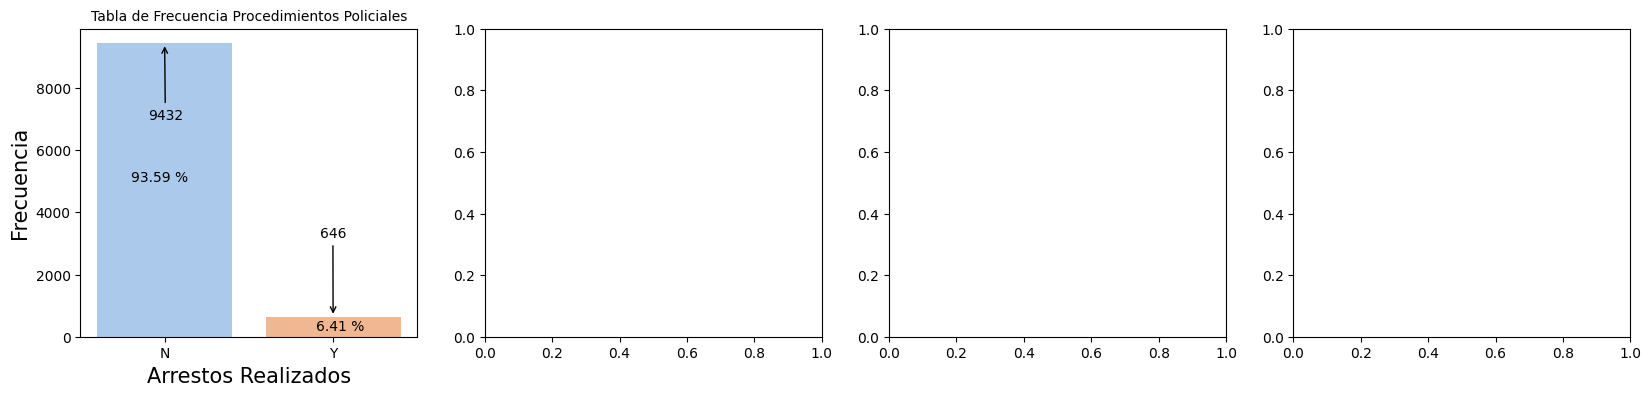

In [485]:
df_filtrado[variable_respuesta]
tabla_de_frecuencia = df_filtrado[variable_respuesta].value_counts()
cantidad_no_arresto = tabla_de_frecuencia[0]
cantidad_arresto = tabla_de_frecuencia[1]
porcentaje_no_arresto =  cantidad_no_arresto / len(df_filtrado) * 100
porcentaje_arresto = cantidad_arresto / len(df_filtrado) * 100

raza_arstmade = [variable_respuesta, 'race']
df_raza_arstmade = df_procedimientos_policiales[raza_arstmade]
tabla_de_frecuencia_raza = pd.crosstab(df_raza_arstmade['race'], df_raza_arstmade['arstmade'])
tabla_de_frecuencia_raza = tabla_de_frecuencia_raza.T

print(tabla_de_frecuencia_raza)

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

sns.barplot(ax=axes[0], x=tabla_de_frecuencia.index, y=tabla_de_frecuencia.values, palette='pastel')
axes[0].set_title('Tabla de Frecuencia Procedimientos Policiales', fontsize=10)
axes[0].set_xlabel('Arrestos Realizados', fontsize=15)
axes[0].set_ylabel('Frecuencia', fontsize=15)
axes[0].annotate(cantidad_no_arresto, xy=(0, 9432), xytext=(-0.1, 7000), fontsize=10,
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
axes[0].annotate(f'{round(porcentaje_no_arresto, 2)} %', xy=(0.8, 5000), xytext=(-0.2, 5000), fontsize=10)
axes[0].annotate(cantidad_arresto, xy=(1, 646), xytext=(0.92, 3200), fontsize=10,
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
axes[0].annotate(f'{round(porcentaje_arresto, 2)} %', xy=(0.9, 200), xytext=(0.9, 200), fontsize=10)




plt.show()



● 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

● 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?